In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
# import ASRE models
cur_dir = os.getcwd()
ASREp_dir = os.path.join(os.path.dirname(os.path.dirname(cur_dir)))
sys.path.append(ASREp_dir)
import ASREp.ground_deformation_models as gdm
import ASREp
import pandas as pd
from scipy import interpolate
from scipy.io import loadmat
np.set_printoptions(threshold=np.inf)
import pickle

In [2]:
output_dir = "./output"
with open(os.path.join(output_dir, 'model_el.pkl'), 'rb') as f:
    model_el = pickle.load(f)
with open(os.path.join(output_dir, 'model_ep.pkl'), 'rb') as f:
    model_ep = pickle.load(f)
greenfield_data_file = os.path.join(output_dir, "greenfield_ground_disp.txt")
greenfield_data = np.loadtxt(greenfield_data_file)
u_x = greenfield_data[:, 0]
u_y = greenfield_data[:, 1]
u_z = greenfield_data[:, 2]

In [3]:
wholeNodesXYZ = model_el.building_node_coords  # (N, 3) array
min_z = np.min(wholeNodesXYZ[:, 2])
print(f"Minimum z value in the mesh: {min_z}")
groundNodeInd = np.where(wholeNodesXYZ[:, 2] == min_z)[0]  # indices of ground nodes
x = wholeNodesXYZ[groundNodeInd, 0]
y = wholeNodesXYZ[groundNodeInd, 1]
# z = wholeNodesXYZ[groundNodeInd, 2]
z = np.zeros_like(x)  # set z to zero for ground surface

Minimum z value in the mesh: 0.0


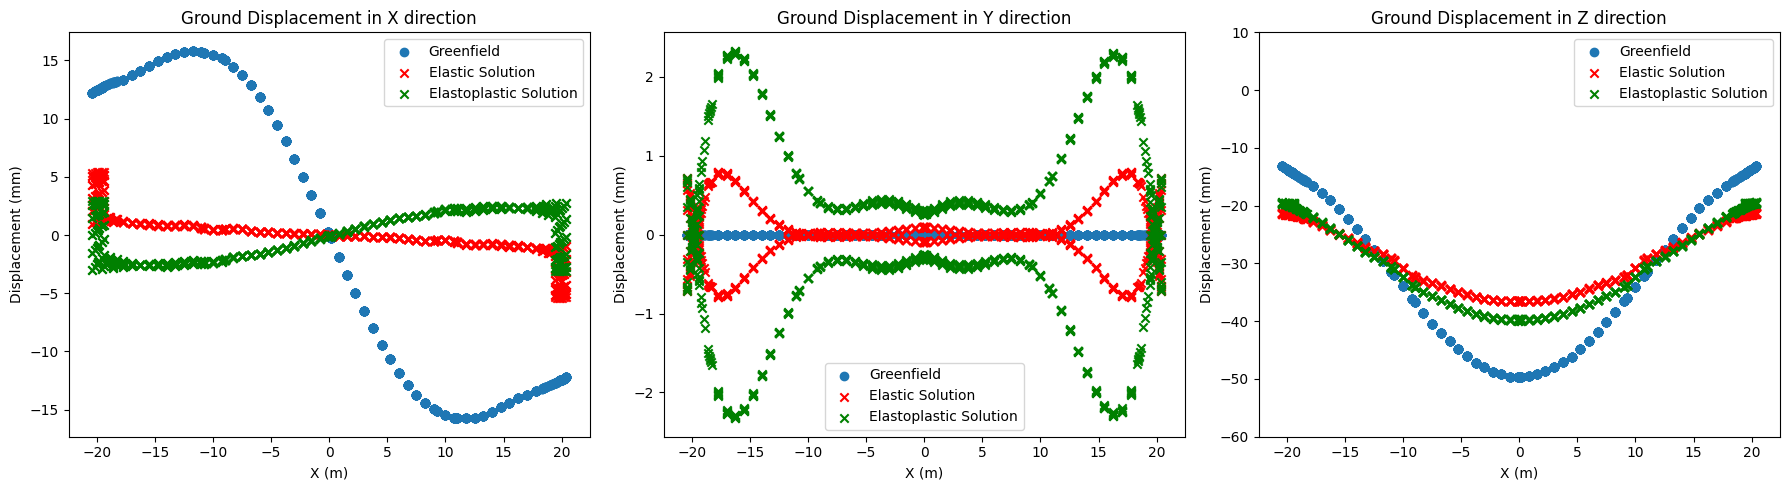

In [4]:
# Plot the ground displacements
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes[0].scatter(x, u_x*1000, label='Greenfield')
axes[0].scatter(x, model_el.building_dispX[groundNodeInd]*1000, marker='x', color='r', label='Elastic Solution')
axes[0].scatter(x, model_ep.building_dispX[groundNodeInd]*1000, marker='x', color='g', label='Elastoplastic Solution')
axes[0].set_title("Ground Displacement in X direction")
axes[1].scatter(x, u_y*1000, label='Greenfield')
axes[1].scatter(x, model_el.building_dispY[groundNodeInd]*1000, marker='x', color='r', label='Elastic Solution')
axes[1].scatter(x, model_ep.building_dispY[groundNodeInd]*1000, marker='x', color='g', label='Elastoplastic Solution')
axes[1].set_title("Ground Displacement in Y direction")
axes[2].scatter(x, u_z*1000, label='Greenfield')
axes[2].scatter(x, model_el.building_dispZ[groundNodeInd]*1000, marker='x', color='r', label='Elastic Solution')
axes[2].scatter(x, model_ep.building_dispZ[groundNodeInd]*1000, marker='x', color='g', label='Elastoplastic Solution')
axes[2].set_title("Ground Displacement in Z direction")
axes[2].set_ylim([-60, 10])
for ax in axes:
    ax.set_xlabel("X (m)")
    ax.set_ylabel("Displacement (mm)")
plt.tight_layout()
for ax in axes:
    ax.legend()

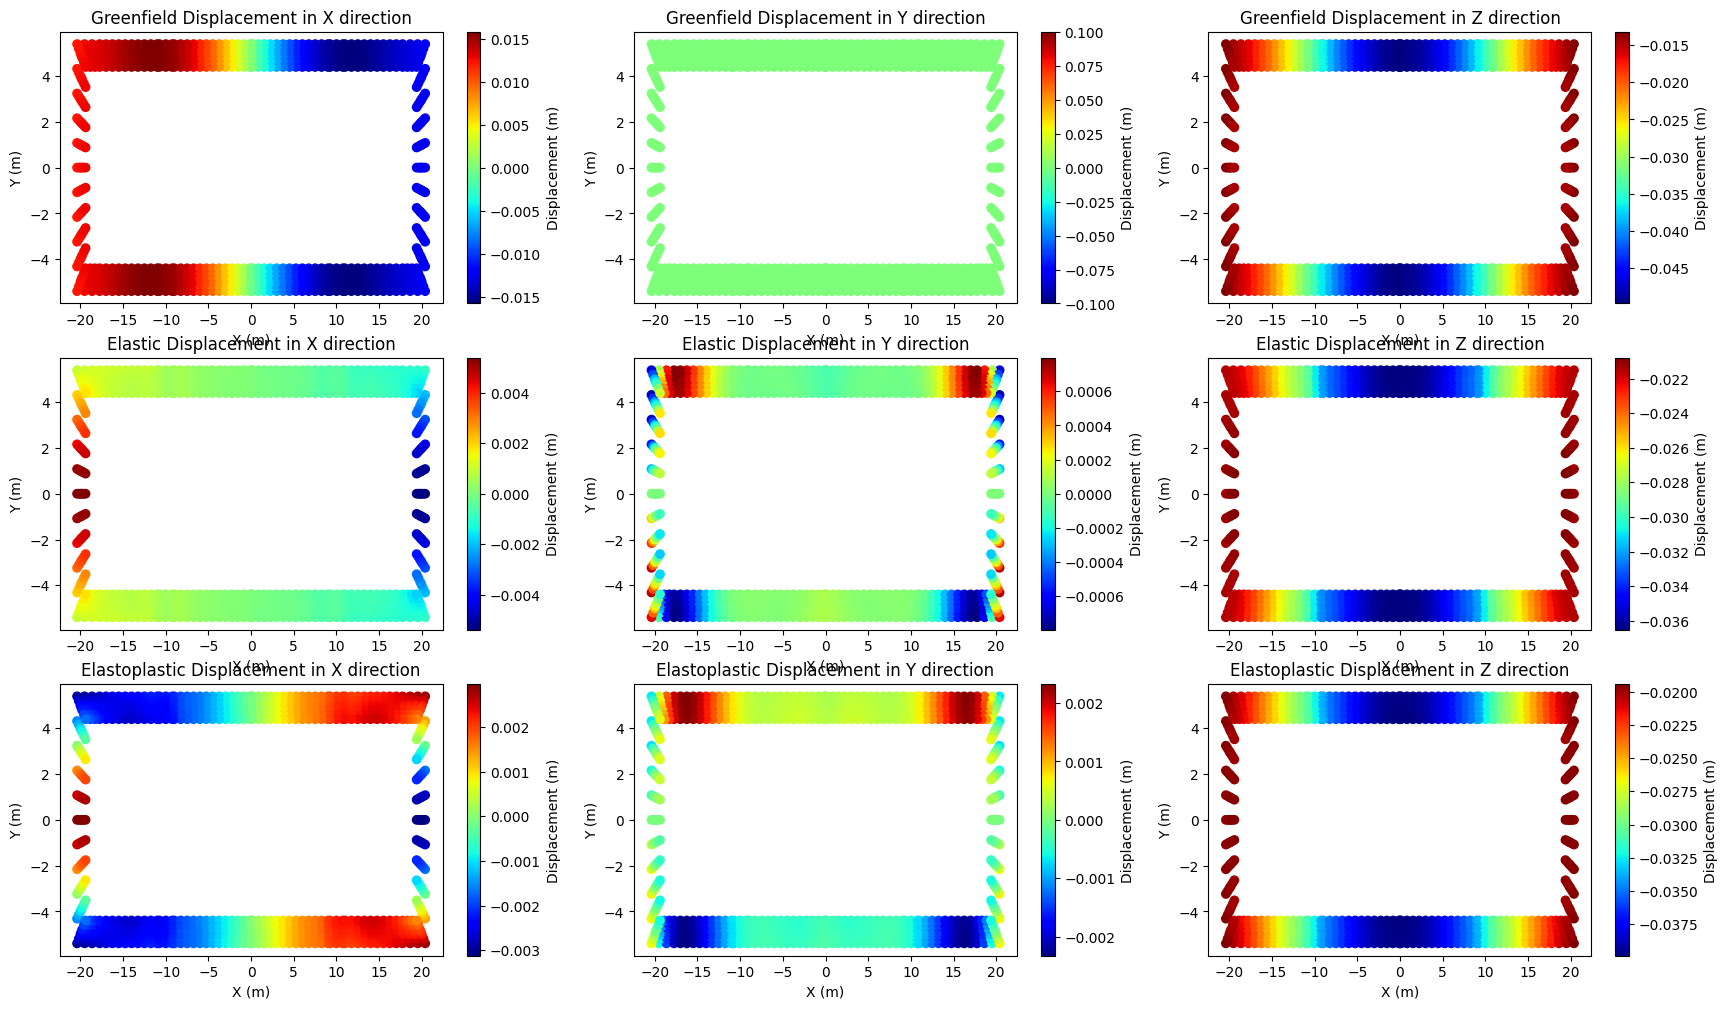

In [5]:
# Plot the ground displacements
fig, axes = plt.subplots(3, 3, figsize=(21, 12))
# Greenfield
axes[0, 0].scatter(x, y, c=u_x, cmap='jet')
axes[0, 0].set_title("Greenfield Displacement in X direction")
axes[0, 1].scatter(x, y, c=u_y, cmap='jet')
axes[0, 1].set_title("Greenfield Displacement in Y direction")
axes[0, 2].scatter(x, y, c=u_z, cmap='jet')
axes[0, 2].set_title("Greenfield Displacement in Z direction")
# Elastic
axes[1, 0].scatter(x, y, c=model_el.building_dispX[groundNodeInd], cmap='jet')
axes[1, 0].set_title("Elastic Displacement in X direction")
axes[1, 1].scatter(x, y, c=model_el.building_dispY[groundNodeInd], cmap='jet')
axes[1, 1].set_title("Elastic Displacement in Y direction")
axes[1, 2].scatter(x, y, c=model_el.building_dispZ[groundNodeInd], cmap='jet')
axes[1, 2].set_title("Elastic Displacement in Z direction")
# Elastoplastic
axes[2, 0].scatter(x, y, c=model_ep.building_dispX[groundNodeInd], cmap='jet')
axes[2, 0].set_title("Elastoplastic Displacement in X direction")
axes[2, 1].scatter(x, y, c=model_ep.building_dispY[groundNodeInd], cmap='jet')
axes[2, 1].set_title("Elastoplastic Displacement in Y direction")
axes[2, 2].scatter(x, y, c=model_ep.building_dispZ[groundNodeInd], cmap='jet')
axes[2, 2].set_title("Elastoplastic Displacement in Z direction")
# Add colorbar to each subplot
for ax in axes.flatten():
    cbar = plt.colorbar(ax.collections[0], ax=ax)
    cbar.set_label("Displacement (m)")
    ax.set_xlabel("X (m)")
    ax.set_ylabel("Y (m)")

In [7]:
model_ep.result_tensile_ptr.max(), model_ep.result_tensile_ptr.min(), np.quantile(model_ep.result_tensile_ptr, 0.99)

(np.float64(0.0005824427703599944),
 np.float64(1.1608044700749928e-06),
 np.float64(0.000468154411730773))